<a href="https://colab.research.google.com/github/NgomGit/data_analysis/blob/master/Copy_of_DSAIMS2019_Classification_3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Various Python imports

You will be missing some imports such as :`from keras.utils import np_utils` it is up to you to import the correct libraries. Use the class examples to guide you.

In [0]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.utils import np_utils
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


1.15.0


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Load the dataset

In [0]:
#define our two url 
target_url = "https://github.com/NgomGit/group5/raw/master/mortgage-loan-approval/train_labels.csv"
features_url = "https://github.com/NgomGit/group5/raw/master/mortgage-loan-approval/train_values.csv" 

In [0]:
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=1qXaIYmJ7kEqzlXER2-2hAfIp6rP6MA5n')

## View the top 5 rows

In [0]:
dataset.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,...,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,1.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,88.0,88.0,NaN,2.0,1.0,1.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,2876.0,493.0,1.0,5.397605e-79,60.0,60.0,2800.0,2800.0,168.0,5.397605e-79,5.397605e-79,5.397605e-79,168.0,5.397605e-79,168.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,15.0,88.0,88.0,1.0,2.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,7.0,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,NaN,2173.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,20.0,88.0,30.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,2.0,2.0,...,1.0,1.000000e+00,5.397605e-79,2.0,NaN,NaN,2543.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


## Find the unique classes

In [0]:
dataset['_RFHLTH'].unique()

array([2., 1., 9.])

## Task

The dataset contains 329 features and 1 target and is the 2015 Behavioral Risk Factor Surveillance System survey.

The different classes are as follows: 1,2,9

The features represent a number of characteristics about each patient. The classes denote the health condition of a patient (1 = good, 2 = fair/poor health and 9 = Don’t know/ Not Sure Or Refused/Missing).

1) How many inputs would a neural network have if we tried to solve this problem?

2) How many outputs would the neural network have?

3) What is the goal here? What are we trying to achieve with machine learning?

## Preprocessing

Here we drop some columns. We also selecting columns containing numerical values. We are also dropping columns that have NaNs.

In [0]:
dataset.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH','IDATE'], inplace=True)

dataset = dataset.select_dtypes('number')
dataset = dataset.dropna(axis=1)

In [0]:
dataset.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BLOODCHO,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,SEX,MARITAL,EDUCA,RENTHOM1,VETERAN3,EMPLOY1,CHILDREN,QSTVER,QSTLANG,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_DUALUSE,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_LTASTH1,...,_RACEGR3,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,MAXVO2_,FC60_,PAMISS1_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3
0,1.0,1.0,1200.0,2.015000e+09,2.015000e+09,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,2.0,8.0,88.0,10.0,1.0,11011.0,28.78156,3.0,86.344681,1.0,341.384853,2.0,1.0,2.0,1.0,2.0,...,1.0,9.0,1.0,63.0,5.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.000000e+00,1.000000e+00,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,2469.0,423.0,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0
1,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,4.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,1.0,2.0,3.0,88.0,10.0,1.0,11011.0,28.78156,1.0,28.781560,9.0,108.060903,1.0,2.0,1.0,2.0,1.0,...,1.0,7.0,1.0,52.0,4.0,2.0,1.0,4.0,1.0,1.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.000000e+00,1.000000e+00,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,2876.0,493.0,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,1.0,1.0,1200.0,2.015000e+09,2.015000e+09,2.0,2.0,1.0,3.0,1.0,7.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,7.0,88.0,10.0,1.0,11011.0,28.78156,2.0,57.563120,1.0,255.264797,2.0,9.0,1.0,1.0,1.0,...,1.0,11.0,2.0,71.0,6.0,1.0,1.0,2.0,9.0,9.0,9.0,9.0,9.000000e+02,9.0,9.990000e+04,9.0,2.000000e+00,4.000000e+00,5.397605e-79,5.397605e-79,9.0,9.0,1.0,1.0,1.000000e+00,1.000000e+00,9.0,2173.0,373.0,9.000000e+00,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
3,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,2.0,8.0,1.0,10.0,1.0,11011.0,28.78156,3.0,86.344681,1.0,341.384853,2.0,1.0,2.0,1.0,1.0,...,1.0,9.0,1.0,63.0,5.0,2.0,2.0,2.0,5.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.000000e+00,1.000000e+00,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,2469.0,423.0,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0
4,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,5.0,1.0,2.0,8.0,88.0,10.0,1.0,11011.0,28.78156,2.0,57.563120,9.0,258.682223,2.0,1.0,1.0,1.0,1.0,...,1.0,9.0,1.0,61.0,5.0,1.0,1.0,3.0,9.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.000000e+00,5.397605e-79,5.397605e-79,1.000000e+00,9.0,1.0,1.0,1.0,1.000000e+00,5.397605e-79,2.0,2543.0,436.0,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0


## Split the data into features and target

In [0]:
X= dataset.drop('_RFHLTH', axis = 1)
Y = np.array(dataset['_RFHLTH'])

## Scaling

In [0]:
scaled_X = StandardScaler().fit_transform(X)

## Task

Solve the problem using a neural network. Perform any additional processing that might be required.

## Split the data

## Convert Y values into something suitable

Notice that the classes are 1,2 and 9. You won't be able to directly use the to_categorical function. Try for yourself. You'll notice that Keras will try fill in the gaps for the missing values for you.

To overcome this you can use:

```
vocab, inv = np.unique(Y, return_inverse=True)
np_utils.to_categorical(inv)
```

But remember to assign the result back to Y!





In [0]:
vocab, inv = np.unique(Y, return_inverse=True)
Y = np_utils.to_categorical(inv)

In [0]:
vocab

array([1., 2., 9.])

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=.3)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.3)

Always a good idea to check the shapes of the data after doing something with it

In [0]:
print (X_train.shape)
print (Y_train.shape)

NameError: ignored

In [0]:
print(X_val.shape)
print (Y_val.shape)

(1968, 86)
(1968, 3)


In [0]:
print(X_test.shape)
print (Y_test.shape)

(2811, 86)
(2811, 3)


This is an imbalanced dataset, and we can know this as follows by looking at the number of examples which belong to the various classes. Clearly the class 1 is the majority class. We can compute the ratio of the other classes compared to the majority so that we can assign weights. We assign weights such that when the network gets an example from a minority class right, it will receive a higher weight. The majority class takes on a weight of 1.

In [0]:
np.sum(np.argmax(Y_train,1)==0)

3482

In [0]:
np.sum(np.argmax(Y_train,1)==1)

1082

In [0]:
np.sum(np.argmax(Y_train,1)==2)

25

In [0]:
print('Class 2 amount vs majority:', 3482/1082)
print('Class 3 amount vs majority:', 3482/25)

Class 2 amount vs majority: 3.2181146025878005
Class 3 amount vs majority: 139.28


## Create and initialise a model

In [0]:
def network():
  
    model = Sequential()
    model.add(Dense(86, input_dim=86, activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

In [0]:
model = network()

## Determine the number of trainable parameters

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 86)                7482      
_________________________________________________________________
dropout_22 (Dropout)         (None, 86)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 16)                1392      
_________________________________________________________________
dropout_23 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 51        
Total params: 8,925
Trainable params: 8,925
Non-trainable params: 0
_________________________________________________________________


## Train the model

Notice here we specify a class weight. The idea is that since the data is imbalanced, we can assign a weight to attach more importance to the minority class data. The majority class keeps a weight of 1.

For example, if there are 1000 examples in class 0, and 10 in class 1, then the weight for class 1 would be 100 (10 examles * weight 100 = 1000). The number of examples in the classes multiplied by the corresponding weight should roughly equal to the number of examples in the majority class.

The weights were computed above.

In this instance we have the following (all these values were obtained above):

Number of examples in class 0 (majority class) = 3482

3 (weight) * 1082 (training examples in class 1) = 3246 which is close enough to 3482

139 (weight) * 25 (training examples in class 2) = 3225 which is close enough to 3482

In [0]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), 
                    epochs=30, 
                    batch_size=8, 
                    verbose=1, 
                    class_weight={0: 1, 1: 3, 2: 139})

Train on 4589 samples, validate on 1968 samples
Epoch 1/30
4589/4589 [==============================] - 3s 596us/step - loss: 4.5594 - acc: 0.5524 - val_loss: 0.7579 - val_acc: 0.6977
Epoch 2/30
4589/4589 [==============================] - 1s 236us/step - loss: 3.1035 - acc: 0.5485 - val_loss: 0.8665 - val_acc: 0.6108
Epoch 3/30
4589/4589 [==============================] - 1s 237us/step - loss: 2.6599 - acc: 0.5202 - val_loss: 0.8738 - val_acc: 0.5965
Epoch 4/30
4589/4589 [==============================] - 1s 239us/step - loss: 2.3214 - acc: 0.5557 - val_loss: 0.8110 - val_acc: 0.6341
Epoch 5/30
4589/4589 [==============================] - 1s 238us/step - loss: 2.4403 - acc: 0.5443 - val_loss: 0.8345 - val_acc: 0.5823
Epoch 6/30
4589/4589 [==============================] - 1s 231us/step - loss: 2.0063 - acc: 0.5842 - val_loss: 0.8365 - val_acc: 0.5879
Epoch 7/30
4589/4589 [==============================] - 1s 261us/step - loss: 1.9727 - acc: 0.5942 - val_loss: 0.8223 - val_acc: 0.6245


## Predict classes on validation data

In [0]:
prediction_classes_val = model.predict_classes(X_val)

NameError: ignored

In [0]:
prediction_classes_val[0:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [0]:
Y_val[0:10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
confusion_matrix(np.argmax(Y_val,1), prediction_classes_val)

array([[1147,  299,   27],
       [ 141,  332,   18],
       [   1,    2,    1]])

## Plot the training error

In [0]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['acc'])
    plt.plot(h['val_acc'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

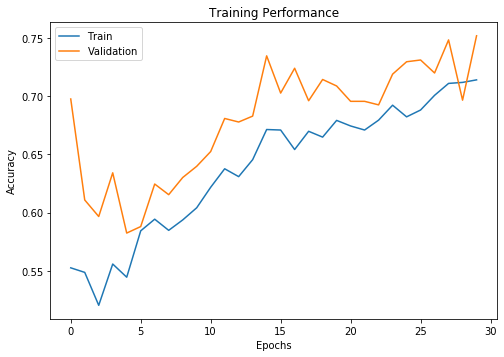

In [0]:
plot_hist(history.history, xsize=8, ysize=12)

## Evaluate the model

On data that was not used during training

In [0]:
prediction_classes_test = model.predict_classes(X_test)

In [0]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes_test)

array([[1642,  422,   37],
       [ 199,  460,   39],
       [   3,    8,    1]])